C:\Users\kkt82\AppData\Local\Temp\ipykernel_3716\3442879408.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=accident_count_by_district.index, y=accident_count_by_district.values, palette='viridis')


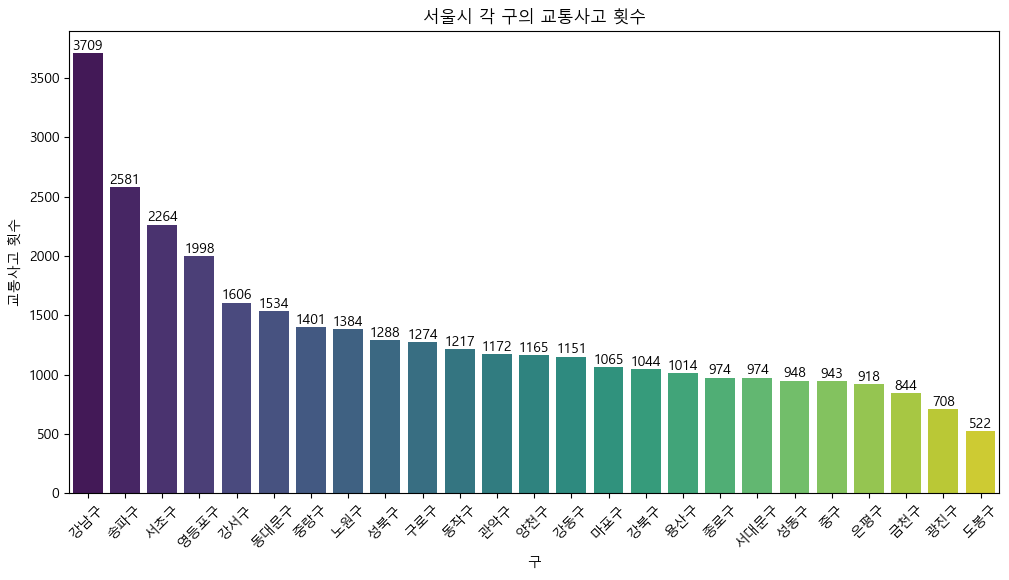

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '2022서울교통사고final.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '시'로 끝나는 부분만 추출
cities_ending_with_si = df['시군구'].str.extract(r'서울특별시\s*([가-힣]+구)')

# 각 구별 교통사고 횟수를 계산
accident_count_by_district = cities_ending_with_si[0].value_counts()

# 각 구별 교통사고 횟수를 bar plot으로 시각화
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=accident_count_by_district.index, y=accident_count_by_district.values, palette='viridis')

# 각 막대 위에 숫자 표기 (정수로 변환하여 표시)
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('서울시 각 구의 교통사고 횟수')
plt.xlabel('구')
plt.ylabel('교통사고 횟수')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import json

# 교통사고 데이터 로드
accidents_path = '2022서울교통사고final.csv'
df_accidents = pd.read_csv(accidents_path)

# 서울시 각 구의 중심좌표 데이터 로드
centers_path = 'centers.json'
with open(centers_path, 'r', encoding='utf-8') as file:
    centers = json.load(file)

# 서울시 각 구의 경계좌표 데이터 로드
geo_path = 'seoul_geo.json'
with open(geo_path, 'r', encoding='utf-8') as file:
    seoul_geo = json.load(file)

# 데이터 확인
df_accidents.head(), list(centers.items())[0], seoul_geo['features'][0]

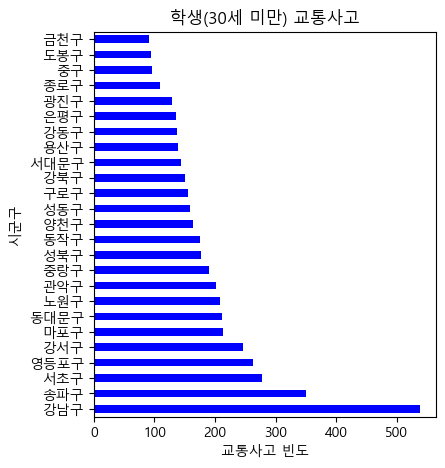

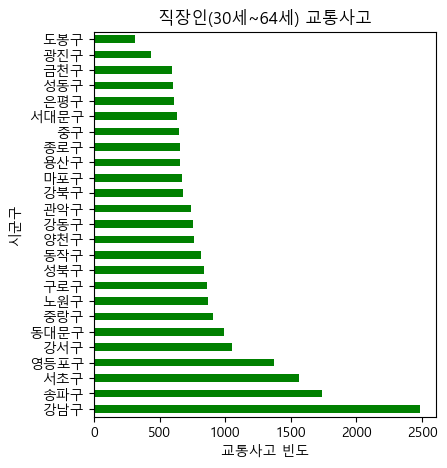

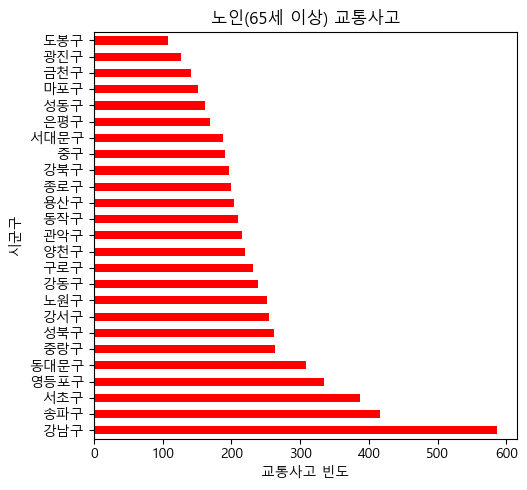

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 교통사고 데이터 로드
accidents_path = '2022서울교통사고final.csv'
df_accidents = pd.read_csv(accidents_path)

# '가해운전자 연령' 열에서 '세' 제거하고 정수로 변환
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].str.replace('세', '').astype(str)

# '시군구' 열에서 '서울특별시' 다음에 나오는 '구'까지만 추출
df_accidents['시군구'] = df_accidents['시군구'].str.extract(r'서울특별시\s*([가-힣]+구)')

# '미분류' 값을 NaN으로 대체하고 NaN 값을 제거
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].replace('미분류', np.nan)
df_accidents = df_accidents.dropna(subset=['가해운전자 연령'])
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].astype(int)

# 연령대에 따른 데이터 추출 (예: 학생은 30세 미만으로 가정)
students = df_accidents[df_accidents['가해운전자 연령'] < 30]
workers = df_accidents[(df_accidents['가해운전자 연령'] >= 30) & (df_accidents['가해운전자 연령'] < 65)]
elderly = df_accidents[df_accidents['가해운전자 연령'] >= 65]

# 각 연령대별 구역별 교통사고 빈도 계산 및 내림차순 정렬
students_by_district = students['시군구'].value_counts().sort_values(ascending=False)
workers_by_district = workers['시군구'].value_counts().sort_values(ascending=False)
elderly_by_district = elderly['시군구'].value_counts().sort_values(ascending=False)

# 그래프 시각화
plt.figure(figsize=(15, 5))  # 전체 그래프의 크기 설정

# 첫 번째 그래프: 학생(30세 미만) 교통사고
plt.subplot(131)
students_by_district.plot(kind='barh', title='학생(30세 미만) 교통사고', color='blue')
plt.xlabel('교통사고 빈도')  # X 축 라벨 설정

# 두 번째 그래프: 직장인(30세~64세) 교통사고
plt.figure(figsize=(15, 5))  # 새로운 Figure 생성
plt.subplot(132)
workers_by_district.plot(kind='barh', title='직장인(30세~64세) 교통사고', color='green')
plt.xlabel('교통사고 빈도')  # X 축 라벨 설정

# 세 번째 그래프: 노인(65세 이상) 교통사고
plt.figure(figsize=(15, 5))  # 새로운 Figure 생성
plt.subplot(133)
elderly_by_district.plot(kind='barh', title='노인(65세 이상) 교통사고', color='red')
plt.xlabel('교통사고 빈도')  # X 축 라벨 설정

plt.tight_layout()
plt.show()


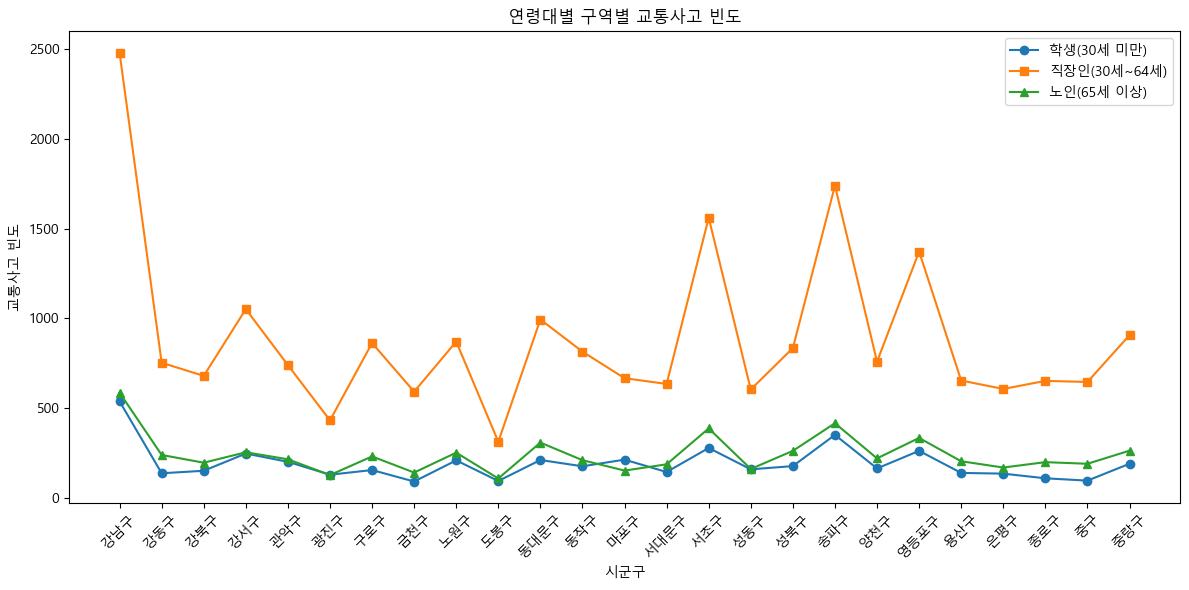

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 교통사고 데이터 로드
accidents_path = '2022서울교통사고final.csv'
df_accidents = pd.read_csv(accidents_path)

# '가해운전자 연령' 열에서 '세' 제거하고 정수로 변환
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].str.replace('세', '').astype(str)

# '시군구' 열에서 '서울특별시' 다음에 나오는 '구'까지만 추출
df_accidents['시군구'] = df_accidents['시군구'].str.extract(r'서울특별시\s*([가-힣]+구)')

# '미분류' 값을 NaN으로 대체하고 NaN 값을 제거
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].replace('미분류', None)
df_accidents = df_accidents.dropna(subset=['가해운전자 연령'])
df_accidents['가해운전자 연령'] = df_accidents['가해운전자 연령'].astype(int)

# 연령대에 따른 데이터 추출 (예: 학생은 30세 미만으로 가정)
students = df_accidents[df_accidents['가해운전자 연령'] < 30]
workers = df_accidents[(df_accidents['가해운전자 연령'] >= 30) & (df_accidents['가해운전자 연령'] < 65)]
elderly = df_accidents[df_accidents['가해운전자 연령'] >= 65]

# 각 연령대별 구역별 교통사고 빈도 계산
students_by_district = students['시군구'].value_counts().sort_index()
workers_by_district = workers['시군구'].value_counts().sort_index()
elderly_by_district = elderly['시군구'].value_counts().sort_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))

# 학생(30세 미만) 꺾은선 그래프
plt.plot(students_by_district.index, students_by_district.values, label='학생(30세 미만)', marker='o')

# 직장인(30세~64세) 꺾은선 그래프
plt.plot(workers_by_district.index, workers_by_district.values, label='직장인(30세~64세)', marker='s')

# 노인(65세 이상) 꺾은선 그래프
plt.plot(elderly_by_district.index, elderly_by_district.values, label='노인(65세 이상)', marker='^')

plt.xlabel('시군구')
plt.ylabel('교통사고 빈도')
plt.title('연령대별 구역별 교통사고 빈도')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
